# ridge regression

In [1]:
N = 100
P = 2
X = array(rnorm(N*P),c(N,P))

In [2]:
beta_true = array(c(1/2,3/4),c(2,1))

In [3]:
y = X%*%beta_true + rnorm(N,0,0.1)

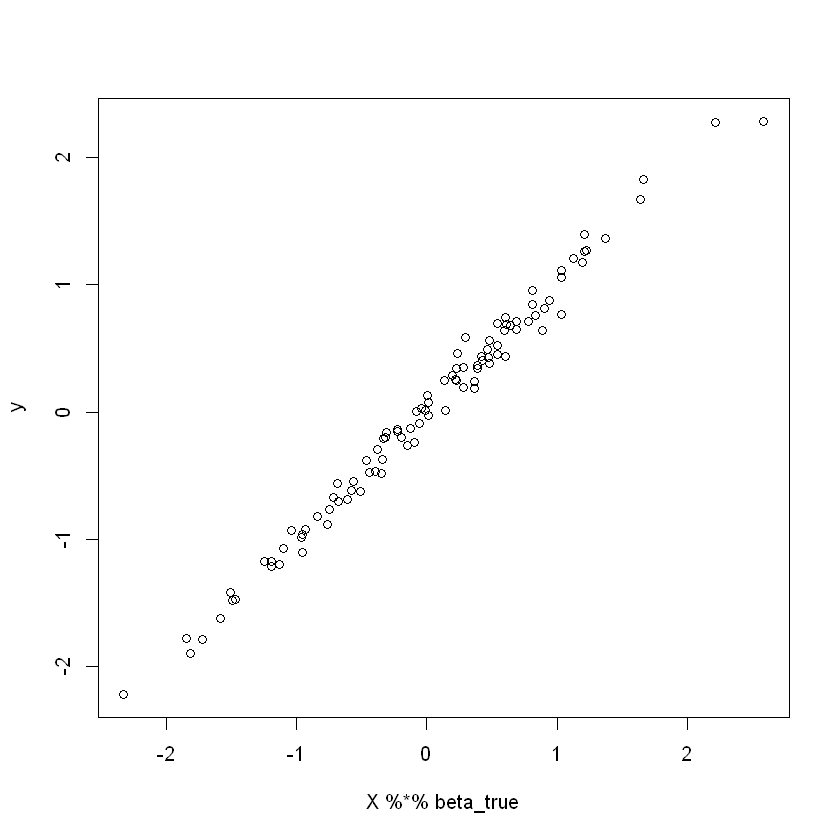

In [4]:
plot(X%*%beta_true,y)

In [5]:
L = function(beta){
    return(sum((y-X%*%beta)^2))
}

In [6]:
constr = function(beta){
    return(sum(beta^2))
}

In [7]:
beta_seq = seq(-1,1,length.out=100)
beta_df = expand.grid(b1=beta_seq,b2=beta_seq)

In [8]:
beta_df$L = apply(beta_df[,1:2],1,function(b)L(b))
beta_df$penalty = apply(beta_df[,1:2],1,function(b)constr(b))

In [9]:
library('ggplot2')
library('viridis')

Warning message:
"package 'viridis' was built under R version 4.0.5"
Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.0.5"


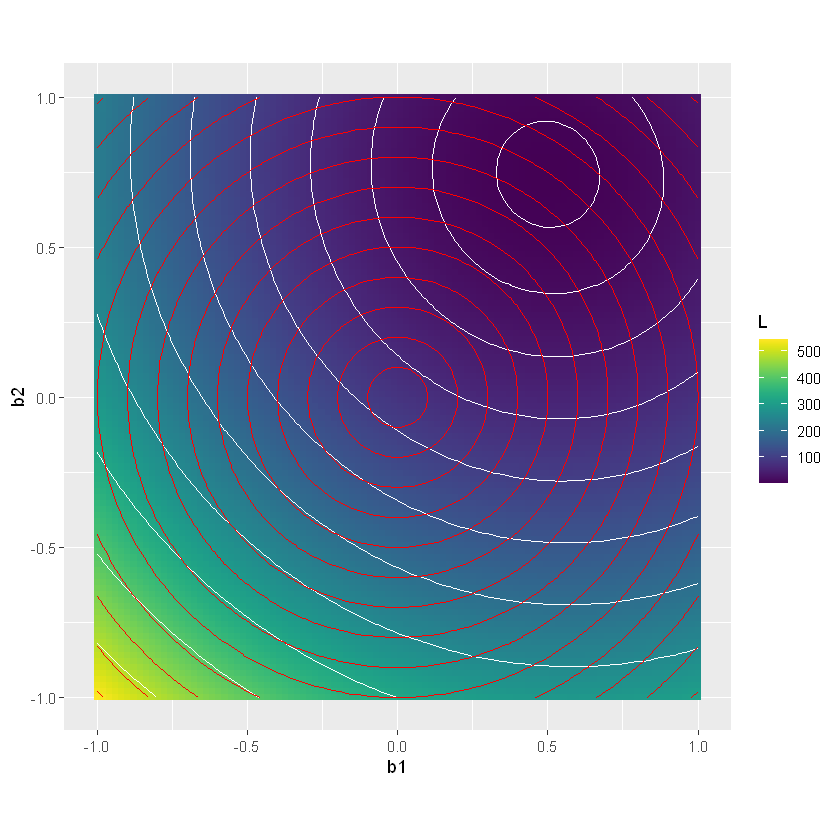

In [10]:
ggplot(data=beta_df,mapping=aes(x=b1,y=b2,fill=L,z=sqrt(L)))+
    geom_tile()+
    scale_fill_viridis()+
    geom_contour(color='white')+
    geom_contour(mapping=aes(x=b1,y=b2,z=sqrt(penalty)),color='red',inherit.aes=FALSE)+
    coord_fixed()

## lasso

In [11]:
constr = function(beta){
    return(sum(abs(beta)))
}

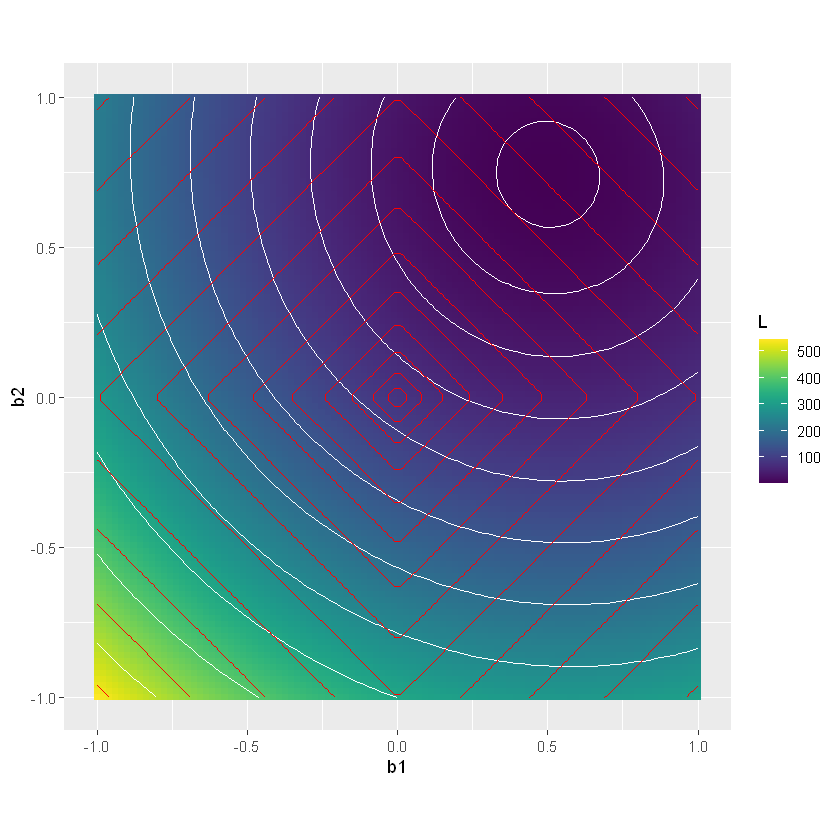

In [12]:
beta_df = expand.grid(b1=beta_seq,b2=beta_seq)
beta_df$L = apply(beta_df[,1:2],1,function(b)L(b))
beta_df$penalty = apply(beta_df[,1:2],1,function(b)constr(b))

ggplot(data=beta_df,mapping=aes(x=b1,y=b2,fill=L,z=sqrt(L)))+
    geom_tile()+
    scale_fill_viridis()+
    geom_contour(color='white')+
    geom_contour(mapping=aes(x=b1,y=b2,z=sqrt(penalty)),color='red',inherit.aes=FALSE)+
    coord_fixed()

# logistic regression

In [13]:
beta_true = array(c(5,6),c(2,1))

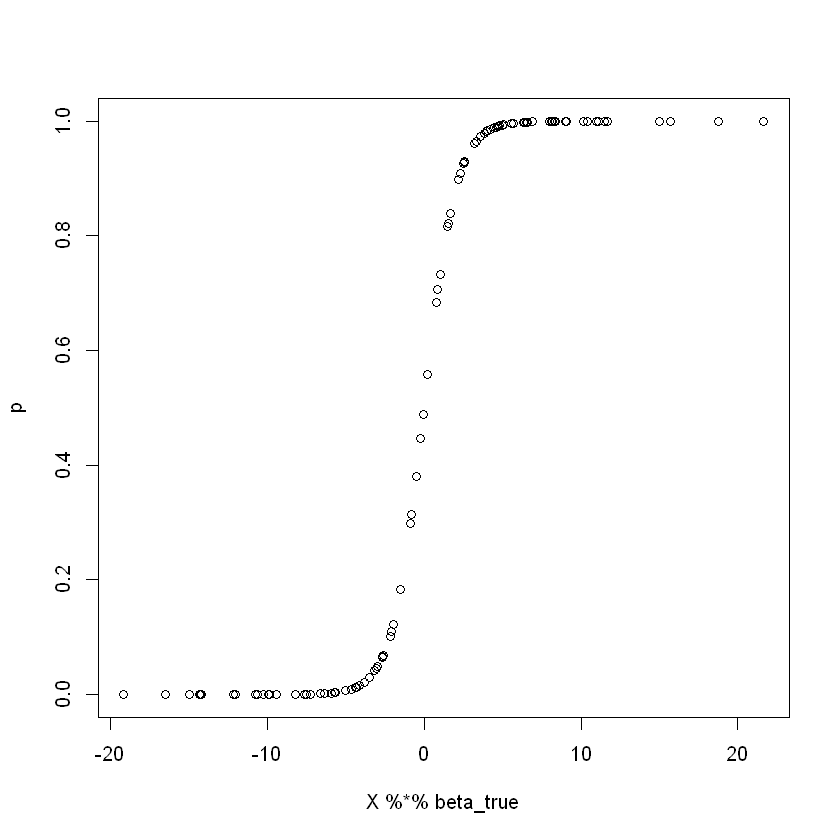

In [14]:
p = 1/(1+exp(-X%*%beta_true))
plot(X%*%beta_true,p)

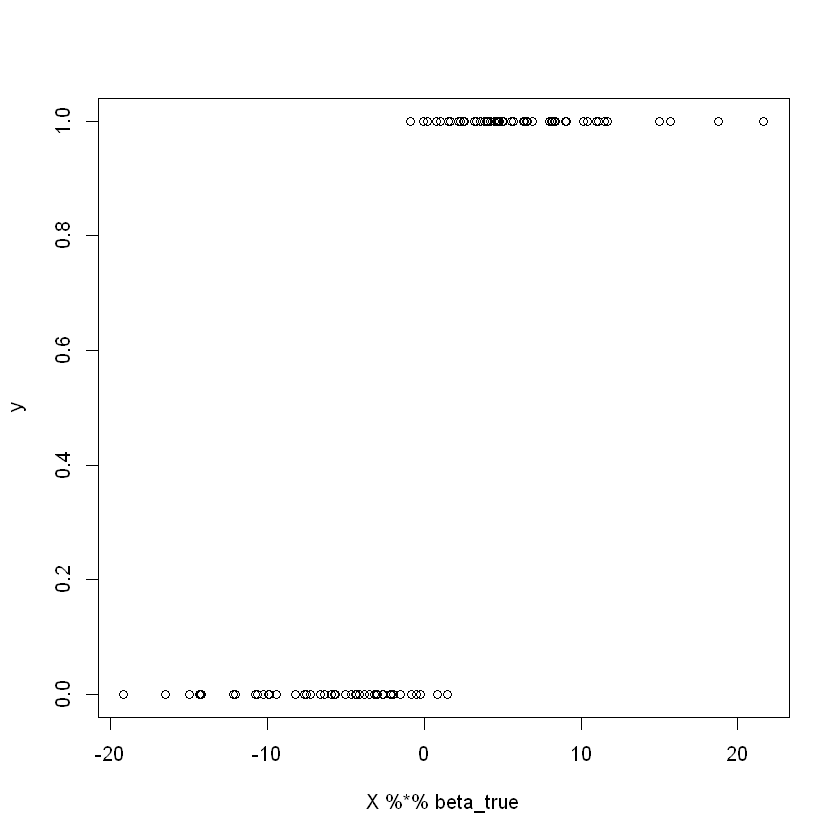

In [15]:
y = sapply(p,function(pp)rbinom(1,1,pp))
plot(X%*%beta_true,y)

In [16]:
L = function(beta){
    ps = 1/(1+exp(-X%*%beta))
    nlls = sapply(1:length(ps),function(i)-dbinom(y[i],1,ps[i],log=TRUE))
    return(sum(nlls))
}

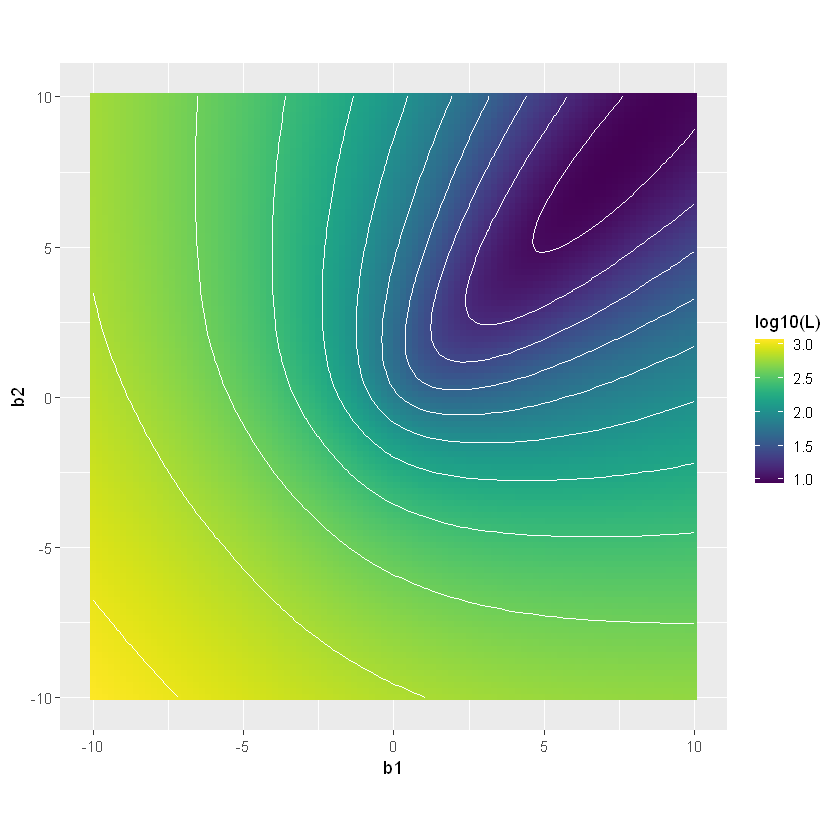

In [17]:
beta_seq = seq(-10,10,length.out=100)
beta_df = expand.grid(b1=beta_seq,b2=beta_seq)
beta_df$L = apply(beta_df[,1:2],1,function(b)L(b))
beta_df$penalty = apply(beta_df[,1:2],1,function(b)constr(b))

ggplot(data=beta_df,mapping=aes(x=b1,y=b2,fill=log10(L),z=log10(L)))+
    geom_tile()+
    scale_fill_viridis()+
    geom_contour(color='white')+
    coord_fixed()

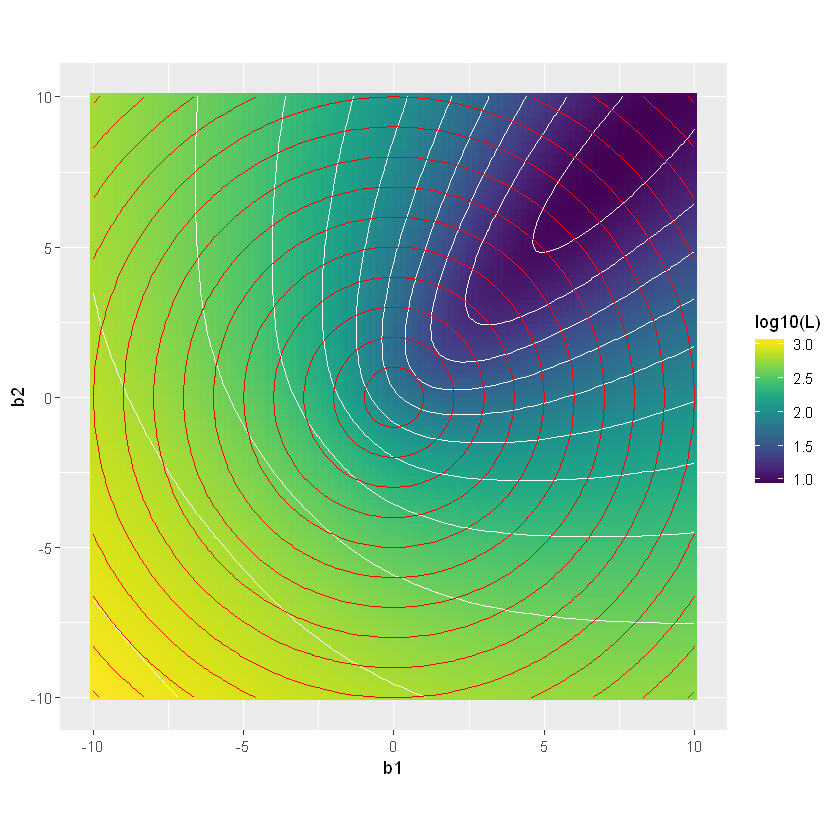

In [18]:
constr = function(beta){
    return(sum(abs(beta)^2))
}

beta_seq = seq(-10,10,length.out=100)
beta_df = expand.grid(b1=beta_seq,b2=beta_seq)
beta_df$L = apply(beta_df[,1:2],1,function(b)L(b))
beta_df$penalty = apply(beta_df[,1:2],1,function(b)constr(b))

ggplot(data=beta_df,mapping=aes(x=b1,y=b2,fill=log10(L),z=log10(L)))+
    geom_tile()+
    scale_fill_viridis()+
    geom_contour(color='white')+
    geom_contour(mapping=aes(x=b1,y=b2,z=sqrt(penalty)),color='red',inherit.aes=FALSE)+
    coord_fixed()

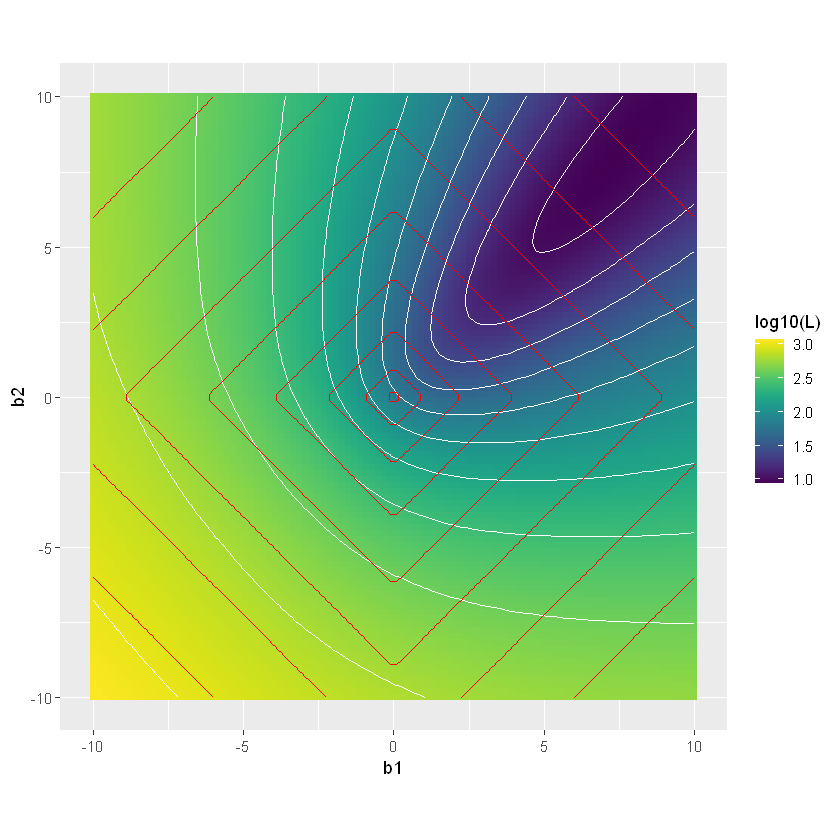

In [19]:
constr = function(beta){
    return(sum(abs(beta)))
}

beta_seq = seq(-10,10,length.out=100)
beta_df = expand.grid(b1=beta_seq,b2=beta_seq)
beta_df$L = apply(beta_df[,1:2],1,function(b)L(b))
beta_df$penalty = apply(beta_df[,1:2],1,function(b)constr(b))

ggplot(data=beta_df,mapping=aes(x=b1,y=b2,fill=log10(L),z=log10(L)))+
    geom_tile()+
    scale_fill_viridis()+
    geom_contour(color='white')+
    geom_contour(mapping=aes(x=b1,y=b2,z=sqrt(penalty)),color='red',inherit.aes=FALSE)+
    coord_fixed()